In [ ]:
# Description: This program classifies a patient having chronic heart disease or not using Artificial neural networks(ANN)


In [ ]:
#import libraries
import glob
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease (1).csv


In [ ]:
df = pd.read_csv('kidney_disease.csv')

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Get the shape of the data(rows and columns)
df.shape

(400, 26)

In [ ]:
#create a list of column names to keep 
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']

#Drop the columns which are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis = 1)
df

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,44,yes,ckd
1,1.020,4.0,0.8,11.3,38,no,ckd
2,1.010,2.0,1.8,9.6,31,no,ckd
3,1.005,4.0,3.8,11.2,32,yes,ckd
4,1.010,2.0,1.4,11.6,35,no,ckd
...,...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,47,no,notckd
396,1.025,0.0,1.2,16.5,54,no,notckd
397,1.020,0.0,0.6,15.8,49,no,notckd
398,1.025,0.0,1.0,14.2,51,no,notckd


In [ ]:
df.isna().sum()

sg                47
al                46
sc                17
hemo              52
pcv               70
htn                2
classification     0
dtype: int64

In [ ]:
df = df.dropna(axis=0)
df

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,44,yes,ckd
1,1.020,4.0,0.8,11.3,38,no,ckd
2,1.010,2.0,1.8,9.6,31,no,ckd
3,1.005,4.0,3.8,11.2,32,yes,ckd
4,1.010,2.0,1.4,11.6,35,no,ckd
...,...,...,...,...,...,...,...
395,1.020,0.0,0.5,15.7,47,no,notckd
396,1.025,0.0,1.2,16.5,54,no,notckd
397,1.020,0.0,0.6,15.8,49,no,notckd
398,1.025,0.0,1.0,14.2,51,no,notckd


In [ ]:
df.columns

Index(['sg', 'al', 'sc', 'hemo', 'pcv', 'htn', 'classification'], dtype='object')

In [ ]:
df[column].dtype == np.number

False

In [ ]:
#print the cleaned data
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,44,yes,ckd
1,1.020,4.0,0.8,11.3,38,no,ckd
2,1.010,2.0,1.8,9.6,31,no,ckd
3,1.005,4.0,3.8,11.2,32,yes,ckd
4,1.010,2.0,1.4,11.6,35,no,ckd


In [ ]:
#Transform the non numeric data in the columns
df['htn'] = df['htn'].replace(['yes'],'1')
df['htn'] = df['htn'].replace(['no'],'0')

df['classification'] = df['classification'].replace(['ckd'],'0')
df['classification'] = df['classification'].replace(['notckd'],'1')




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,44,1,0
1,1.020,4.0,0.8,11.3,38,0,0
2,1.010,2.0,1.8,9.6,31,0,0
3,1.005,4.0,3.8,11.2,32,1,0
4,1.010,2.0,1.4,11.6,35,0,0


In [ ]:
# Split the data into independant and dependant variables datasets

x = df.drop(['classification'], axis = 1)
y = df['classification']


In [ ]:
# Feature scaling
# min-max scaler method: here the values between all the values between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.fit_transform(x)

In [ ]:
# Split the data into 80% training and 20% testsing and shuffle

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [ ]:
# Build the model

model = Sequential()

model.add(Dense(256, input_dim = len(x.columns),
                kernel_initializer=k.initializers.random_normal(seed=13), 
                activation='relu'))

model.add(Dense(1, activation='hard_sigmoid'))

In [ ]:
# compile the model
model.compile (loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(x_train, y_train, epochs = 2000, batch_size= x_train.shape[0])

Epoch 1/2000
229/229 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.4716
Epoch 2/2000
229/229 [==============================] - 0s 22us/step - loss: 0.6841 - accuracy: 0.4760
Epoch 3/2000
229/229 [==============================] - 0s 20us/step - loss: 0.6782 - accuracy: 0.4847
Epoch 4/2000
229/229 [==============================] - 0s 9us/step - loss: 0.6714 - accuracy: 0.5284
Epoch 5/2000
229/229 [==============================] - 0s 21us/step - loss: 0.6651 - accuracy: 0.6157
Epoch 6/2000
229/229 [==============================] - 0s 10us/step - loss: 0.6588 - accuracy: 0.6594
Epoch 7/2000
229/229 [==============================] - 0s 15us/step - loss: 0.6525 - accuracy: 0.7249
Epoch 8/2000
229/229 [==============================] - 0s 11us/step - loss: 0.6462 - accuracy: 0.7773
Epoch 9/2000
229/229 [==============================] - 0s 19us/step - loss: 0.6400 - accuracy: 0.7991
Epoch 10/2000
229/229 [==============================] - 0s 13us/step - los

In [ ]:
# Save the model
model.save('kidney_pred_ANN.model')

Text(0.5, 0, 'epoch')

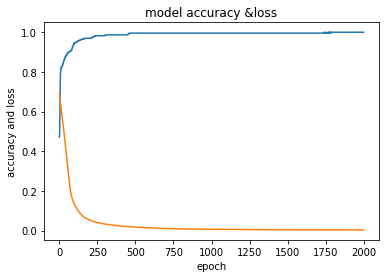

In [ ]:
# Visualize the model loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy &loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [ ]:
# Get the shape of the training and testig data
print('shape of the train data:', x_train.shape)
print('shape of the test data:', x_test.shape)


shape of the train data: (229, 6)
shape of the test data: (58, 6)


In [ ]:
pred = model.predict(x_test)
print(pred)

[[1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.79999065]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.25441366]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.9488015 ]
 [0.        ]
 [1.        ]
 [0.7462932 ]
 [1.        ]
 [0.        ]]


In [ ]:
# Show the actual and predicted values
pred = [1 if y>=0.5 else 0 for y in pred]


print('original: {0}'.format(",".join(str(x)for x in y_test)))
print('predicted: {0}'.format(",".join(str(x)for x in pred)))

original: 1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,1,0,1,0
predicted: 1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,0
